In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
from tqdm import tqdm
%matplotlib inline 

In [2]:
train_img = np.load("train_img.npy")
train_lab = np.load("train_lab.npy")
train_x_noise = np.load('train_adv.npy')
print("train_img's shape: ", train_img.shape)
print("train_lab's shape: ", train_lab.shape)
print("train_x_noise's shape: ", train_x_noise.shape)

train_img's shape:  (550, 100, 784)
train_lab's shape:  (550, 100, 10)
train_x_noise's shape:  (550, 100, 784)


In [3]:
test_img = np.load("test_img.npy")
test_lab = np.load("test_lab.npy")
test_x_noise = np.load('test_adv.npy')
print("test_img's shape: ", test_img.shape)
print("test_lab's shape: ", test_lab.shape)
print("test_x_noise's shape: ", test_x_noise.shape)

test_img's shape:  (100, 100, 784)
test_lab's shape:  (100, 100, 10)
test_x_noise's shape:  (100, 100, 784)


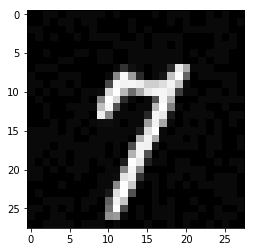

In [4]:
sample_image = train_x_noise[1][2]
sample_image = sample_image.reshape([28, 28])
plt.imshow(sample_image, cmap = "gray")

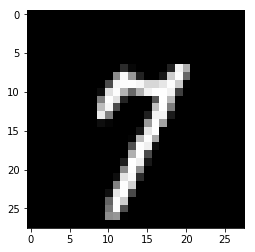

In [5]:
sample_image = train_img[1][2]
sample_image = sample_image.reshape([28, 28])
plt.imshow(sample_image, cmap = "gray")

In [8]:
# NETOWRK PARAMETERS
n_input    = 784 
n_hidden_1 = 32 
n_hidden_2 = 32 
n_output   = 784  

# PLACEHOLDERS
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_output])

# WEIGHTS
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_output]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_output]))
}

# MODEL
def denoise_auto_encoder(_X, _weights, _biases):
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(_X, _weights['h1']), _biases['b1']))  
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, _weights['h2']), _biases['b2']))  
    return tf.nn.sigmoid(tf.matmul(layer_2, _weights['out']) + _biases['out'])

# MODEL AS A FUNCTION
reconstruction = denoise_auto_encoder(x, weights, biases)
print ("NETOWRK READY")

NETOWRK READY


In [9]:
# COST
cost = tf.reduce_mean(tf.pow(reconstruction-y, 2))
# OPTIMIZER
optm = tf.train.AdamOptimizer(1e-3).minimize(cost) 
# INITIALIZER
init = tf.global_variables_initializer()
print ("FUNCTIONS READY")

FUNCTIONS READY


In [10]:
savedir = "tmp/"
saver   = tf.train.Saver(max_to_keep=1)
print ("SAVER READY")

SAVER READY


START OPTIMIZATION


  0%|                                                  | 0/300 [00:00<?, ?it/s]

Epoch 00/300 average cost: 0.141546


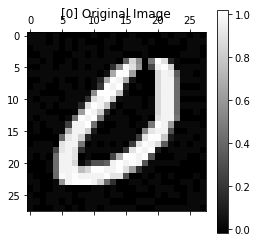

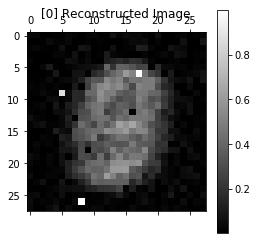

  3%|█▎                                       | 10/300 [00:45<21:00,  4.35s/it]

Epoch 10/300 average cost: 0.043746


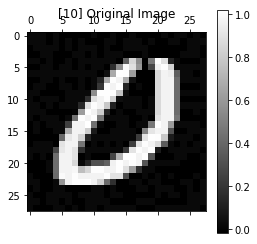

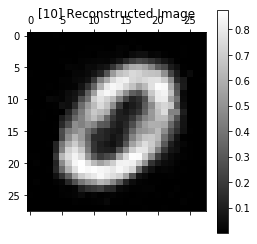

  7%|██▋                                      | 20/300 [01:29<20:12,  4.33s/it]

Epoch 20/300 average cost: 0.036440


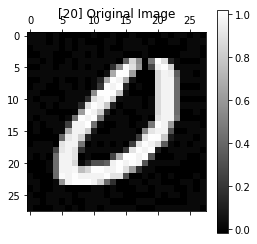

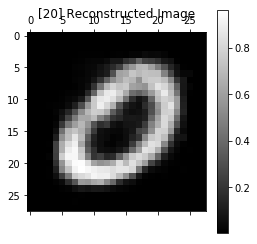

 10%|████                                     | 30/300 [02:14<20:38,  4.59s/it]

Epoch 30/300 average cost: 0.029480


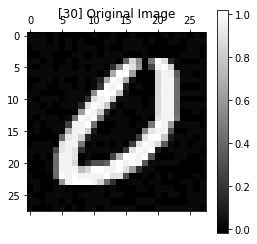

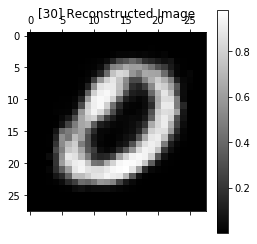

 13%|█████▍                                   | 40/300 [02:56<18:02,  4.16s/it]

Epoch 40/300 average cost: 0.025208


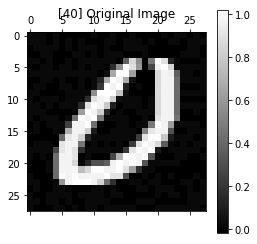

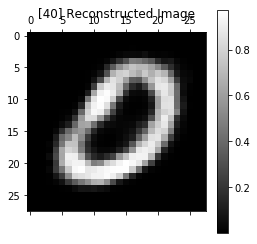

 17%|██████▊                                  | 50/300 [03:38<17:51,  4.29s/it]

Epoch 50/300 average cost: 0.021492


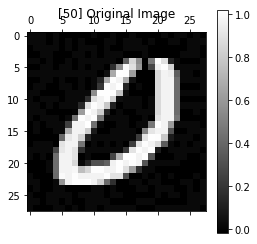

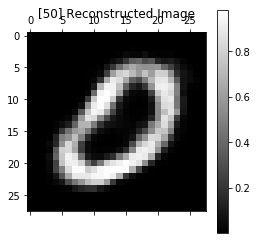

 20%|████████▏                                | 60/300 [04:21<16:58,  4.24s/it]

Epoch 60/300 average cost: 0.018646


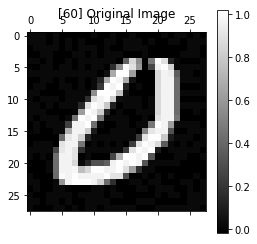

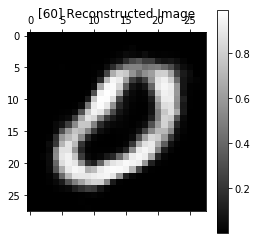

 23%|█████████▌                               | 70/300 [05:04<16:38,  4.34s/it]

Epoch 70/300 average cost: 0.016880


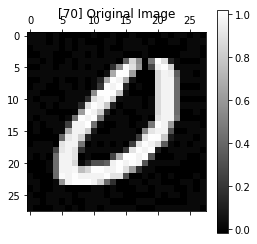

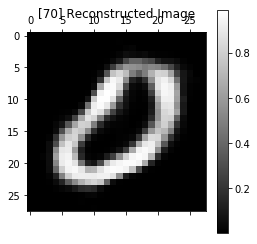

 27%|██████████▉                              | 80/300 [05:49<15:51,  4.33s/it]

Epoch 80/300 average cost: 0.015918


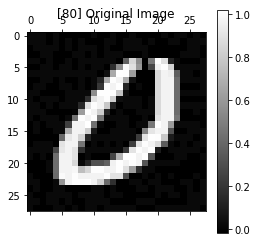

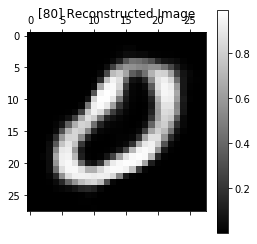

 30%|████████████▎                            | 90/300 [06:32<15:44,  4.50s/it]

Epoch 90/300 average cost: 0.015379


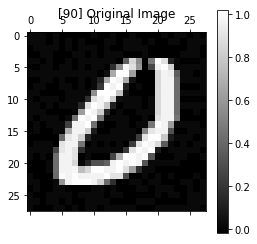

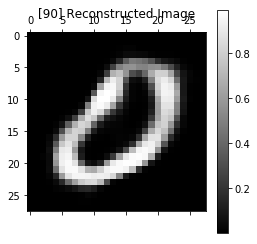

 33%|█████████████▎                          | 100/300 [07:17<14:09,  4.25s/it]

Epoch 100/300 average cost: 0.014971


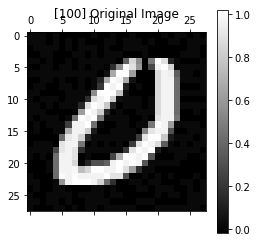

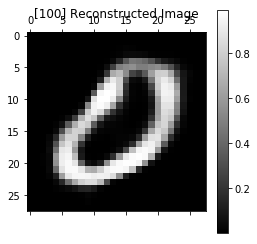

 37%|██████████████▋                         | 110/300 [08:01<13:32,  4.27s/it]

Epoch 110/300 average cost: 0.014576


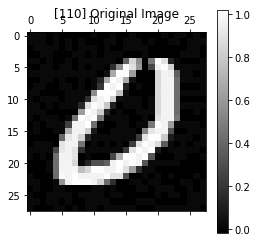

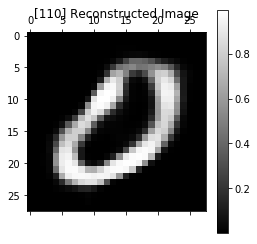

 40%|████████████████                        | 120/300 [08:42<12:26,  4.15s/it]

Epoch 120/300 average cost: 0.014265


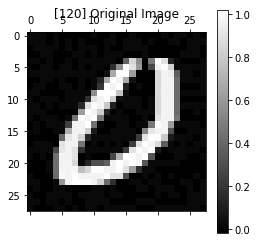

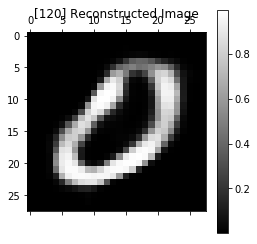

 43%|█████████████████▎                      | 130/300 [09:24<11:47,  4.16s/it]

Epoch 130/300 average cost: 0.013970


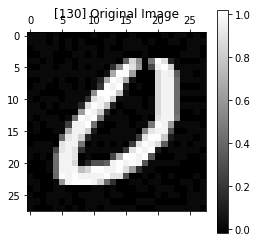

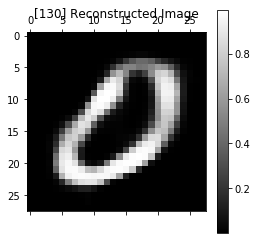

 47%|██████████████████▋                     | 140/300 [10:13<13:25,  5.03s/it]

Epoch 140/300 average cost: 0.013680


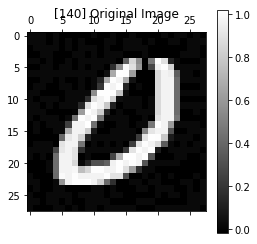

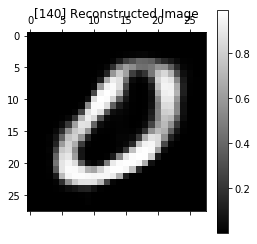

 50%|████████████████████                    | 150/300 [11:03<12:12,  4.88s/it]

Epoch 150/300 average cost: 0.013467


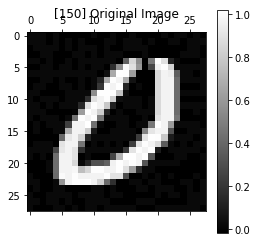

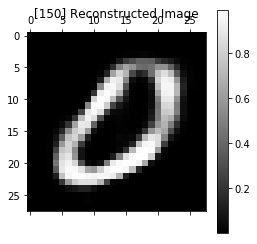

 53%|█████████████████████▎                  | 160/300 [11:51<11:05,  4.75s/it]

Epoch 160/300 average cost: 0.013269


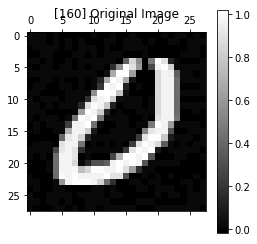

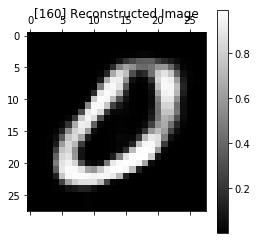

 57%|██████████████████████▋                 | 170/300 [12:33<08:54,  4.11s/it]

Epoch 170/300 average cost: 0.013060


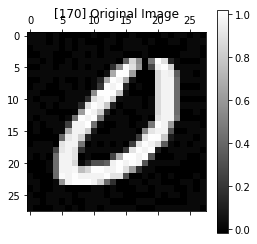

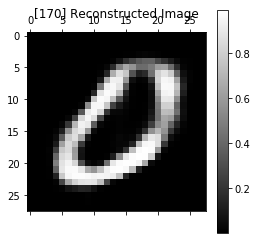

 60%|████████████████████████                | 180/300 [13:14<08:02,  4.02s/it]

Epoch 180/300 average cost: 0.012882


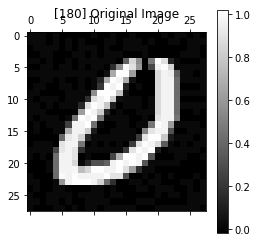

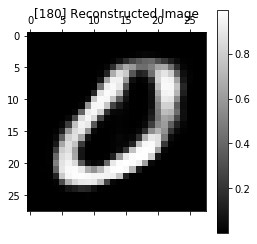

 63%|█████████████████████████▎              | 190/300 [13:54<07:21,  4.01s/it]

Epoch 190/300 average cost: 0.012734


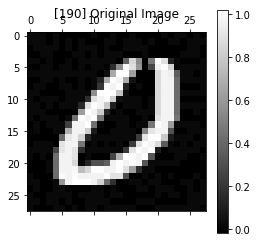

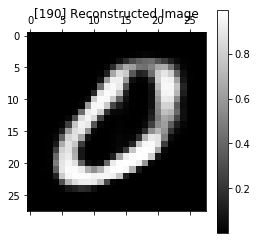

 67%|██████████████████████████▋             | 200/300 [14:37<07:00,  4.20s/it]

Epoch 200/300 average cost: 0.012612


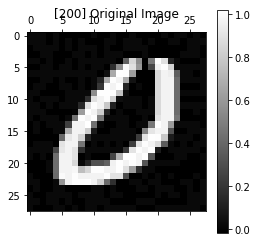

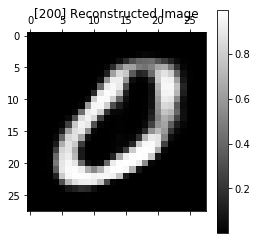

 70%|████████████████████████████            | 210/300 [15:17<05:57,  3.98s/it]

Epoch 210/300 average cost: 0.012508


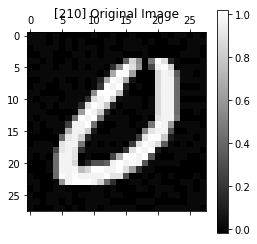

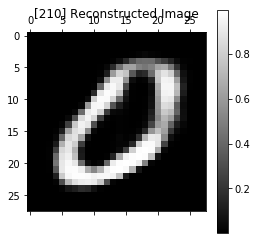

 73%|█████████████████████████████▎          | 220/300 [15:59<05:41,  4.27s/it]

Epoch 220/300 average cost: 0.012418


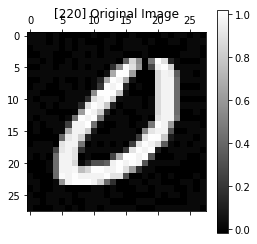

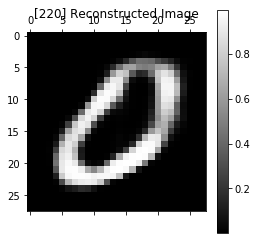

 77%|██████████████████████████████▋         | 230/300 [16:45<05:23,  4.63s/it]

Epoch 230/300 average cost: 0.012335


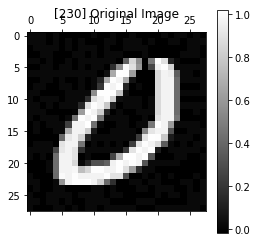

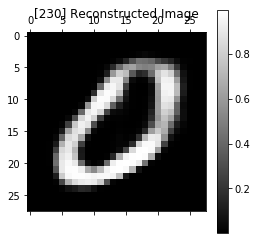

 80%|████████████████████████████████        | 240/300 [17:30<04:25,  4.42s/it]

Epoch 240/300 average cost: 0.012256


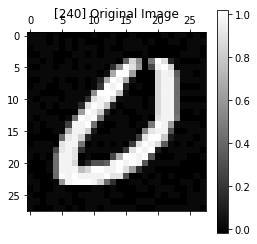

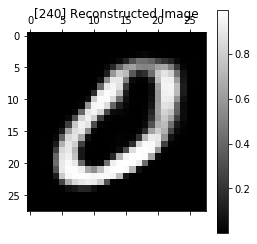

 83%|█████████████████████████████████▎      | 250/300 [18:12<03:25,  4.11s/it]

Epoch 250/300 average cost: 0.012177


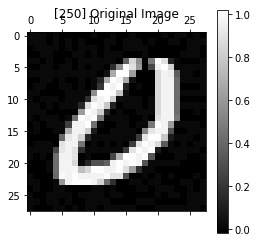

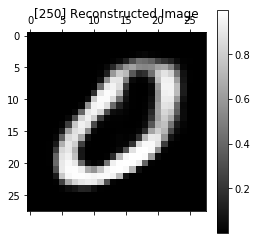

 87%|██████████████████████████████████▋     | 260/300 [18:53<02:43,  4.08s/it]

Epoch 260/300 average cost: 0.012097


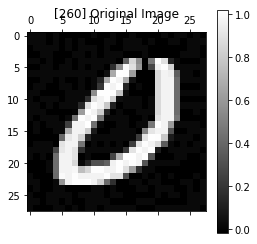

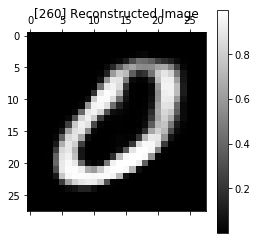

 90%|████████████████████████████████████    | 270/300 [19:34<02:01,  4.05s/it]

Epoch 270/300 average cost: 0.012005


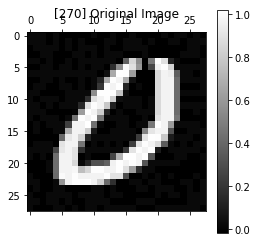

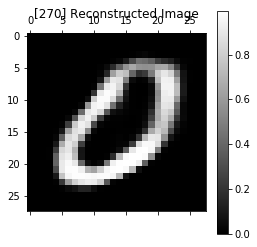

 93%|█████████████████████████████████████▎  | 280/300 [20:16<01:22,  4.13s/it]

Epoch 280/300 average cost: 0.011836


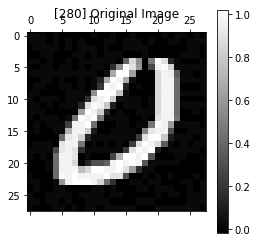

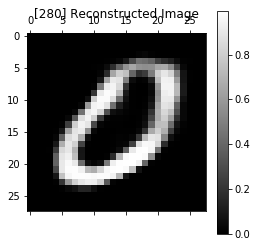

 97%|██████████████████████████████████████▋ | 290/300 [20:57<00:40,  4.10s/it]

Epoch 290/300 average cost: 0.011627


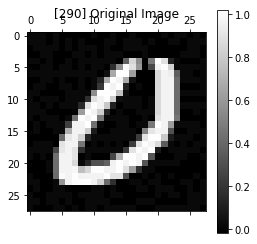

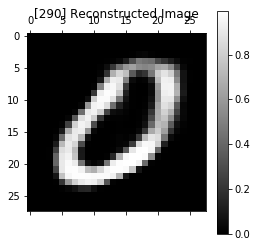

100%|████████████████████████████████████████| 300/300 [21:38<00:00,  4.07s/it]


OPTIMIZATION FINISHED


In [27]:
TRAIN_FLAG = 1
epochs     = 300
batch_size = 100
disp_step  = 10

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)
sess.run(init)
if TRAIN_FLAG:
    print ("START OPTIMIZATION")
    for epoch in tqdm(range(epochs)):
        num_batch  = 550
        total_cost = 0.
        for i in range(num_batch):
            batch_xs = train_img[i].reshape(batch_size, 784)
            batch_ys = train_lab[i].reshape(batch_size, 10)
            batch_xs_noisy = train_x_noise[i].reshape(batch_size, 784)
            feeds = {x: batch_xs_noisy, y: batch_xs}
            sess.run(optm, feed_dict=feeds)
            total_cost += sess.run(cost, feed_dict=feeds)
        # DISPLAY
        if epoch % disp_step == 0:
            print ("Epoch %02d/%02d average cost: %.6f" 
                   % (epoch, epochs, total_cost/num_batch))
            # PLOT
#             randidx  = np.random.randint(test_x_noise.shape[0], size=1)
#             testvec  = test_X[randidx, :]
#             noisyvec = testvec + 0.3*np.random.randn(1, 784)
            testvec = test_x_noise[0][3].reshape(1, 784)
            outvec   = sess.run(reconstruction, feed_dict={x: testvec})
            outimg   = np.reshape(outvec, (28, 28))
            # Plot 
            plt.matshow(np.reshape(testvec, (28, 28)), cmap=plt.get_cmap('gray'))
            plt.title("[" + str(epoch) + "] Original Image")
            plt.colorbar()
            plt.show()
#             plt.matshow(np.reshape(noisyvec, (28, 28)), cmap=plt.get_cmap('gray'))
#             plt.title("[" + str(epoch) + "] Input Image")
#             plt.colorbar()
#             plt.show()
            plt.matshow(outimg, cmap=plt.get_cmap('gray'))
            plt.title("[" + str(epoch) + "] Reconstructed Image")
            plt.colorbar()
            plt.show()
        # SAVE
        saver.save(sess, savedir + 'denoise_auto_encoder.ckpt', global_step=epoch)
print ("OPTIMIZATION FINISHED")

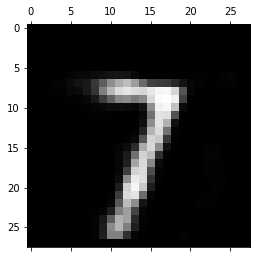

In [28]:
batch_x = test_x_noise[5][0].reshape(-1, 784)
batch_de = sess.run(reconstruction, feed_dict={x: batch_x})
plt.matshow(np.reshape(batch_de, (28, 28)), cmap=plt.get_cmap('gray'))

In [29]:
# 在mnist测试集上生成去噪过后的图像
test_de = []
for i in tqdm(range(100)):
    batch_x = test_x_noise[i].reshape(batch_size, 784)
    batch_de = sess.run(reconstruction, feed_dict={x: batch_x})
    test_de.append(batch_de)
test_de = np.array(test_de)
np.save('test_de.npy', test_de)

100%|███████████████████████████████████████| 100/100 [00:00<00:00, 378.40it/s]
